In [71]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

%matplotlib inline

In [72]:
#Read the dataset and add header to the dataset

df_car = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None,\
                     names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [73]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


 Number of Attributes: 6

 Attribute Values:

   buying       v-high, high, med, low <br>
   maint        v-high, high, med, low <br>
   doors        2, 3, 4, 5-more        <br>
   persons      2, 4, more             <br>
   lug_boot     small, med, big        <br>
   safety       low, med, high         <br>

 Missing Attribute Values: none


In [74]:
df_car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,4,med,med,unacc
freq,432,432,432,576,576,576,1210


In [75]:
print("There are totally {0} columns and they are \n\
        {1} \n".format(len(df_car.columns),df_car.columns))



#fetch numerical columns
df_car_num_dataset = df_car.select_dtypes(include=[np.number])
print("NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_car_num_dataset.columns),df_car_num_dataset.columns))

#fetch non numerical columns
df_car_obj_dataset = df_car.select_dtypes(include=[np.object])
print("NON NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_car_obj_dataset.columns),df_car_obj_dataset.columns))


There are totally 7 columns and they are 
        Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object') 

NUMERICAL COLUMNS :
 There are totally 0 numerical columns and they are 
        Index([], dtype='object')
NON NUMERICAL COLUMNS :
 There are totally 7 numerical columns and they are 
        Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [76]:
#Get unique values for each column
df_car_col = [df_car[i].unique() for i in df_car.columns]
df_car_col

[array(['vhigh', 'high', 'med', 'low'], dtype=object),
 array(['vhigh', 'high', 'med', 'low'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['small', 'med', 'big'], dtype=object),
 array(['low', 'med', 'high'], dtype=object),
 array(['unacc', 'acc', 'vgood', 'good'], dtype=object)]

In [77]:
df_car_uniq_rows = [df_car[i].value_counts() for i in df_car.columns]
df_car_uniq_rows

[med      432
 low      432
 high     432
 vhigh    432
 Name: buying, dtype: int64, med      432
 low      432
 high     432
 vhigh    432
 Name: maint, dtype: int64, 4        432
 2        432
 5more    432
 3        432
 Name: doors, dtype: int64, 4       576
 2       576
 more    576
 Name: persons, dtype: int64, med      576
 big      576
 small    576
 Name: lug_boot, dtype: int64, med     576
 low     576
 high    576
 Name: safety, dtype: int64, unacc    1210
 acc       384
 good       69
 vgood      65
 Name: class, dtype: int64]

All the values except class are equally distributed

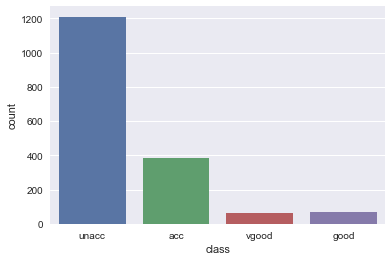

In [78]:
sns.countplot(df_car['class'])

In [79]:
df_car1 = pd.get_dummies(df_car,columns=['buying','maint','doors','persons','lug_boot','safety','class'])

In [80]:
df_car1.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


scikit learn normally do not work with categolical values, using sklearn library converting the values to numerical

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df_car.columns:
    df_car[i]=le.fit_transform(df_car[i])


In [84]:
df_car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


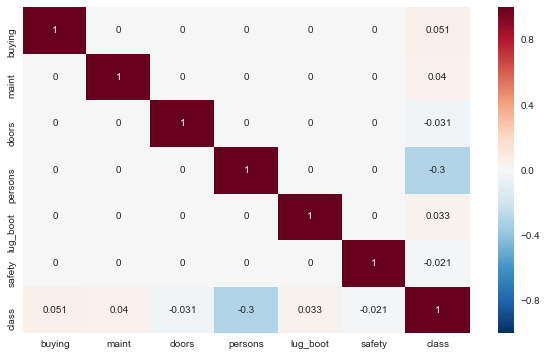

In [85]:

fig=plt.figure(figsize=(10,6))
sns.heatmap(df_car.corr(),annot=True)

There is no correlation between any other fields other than class.
Class has very low correlation with all the variables and the lowest is with persons

In [88]:
#get the features in X variable and Y the variable which needs to be predicted

X = df_car[df_car.columns[:-1]]
Y=df_car['class']



In [102]:
X.shape

(1728, 6)

Divide the data in test and train datasets

In [103]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model Selection

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

In [105]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [107]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
pred=logreg.predict(X_test)

In [110]:
logreg.score(X_test,Y_test)

0.65895953757225434